### Singapore Flat Prices prediction

In [61]:
#import needed libraries
#do !pip install scikit-learn
import glob
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [75]:
#path = r"data\Data\singapore_data"
path1 = r"C:\kannan\code\ml_analysis\data\Data\singapore_data"
all_files = glob.glob(os.path.join(path1,"*.*"))

In [77]:
l = []
for f in all_files:
    df1 = pd.read_csv(f, index_col=None, header=0)
    l.append(df1)
    
df = pd.concat(l, axis=0, ignore_index=True)

In [91]:
nan_counts = df.isna().sum()

In [92]:
nan_counts

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
new_lease                   0
dtype: int64

In [83]:
df.groupby('remaining_lease').count()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
remaining_lease,,,,,,,,,,
48,1,1,1,1,1,1,1,1,1,1
49,88,88,88,88,88,88,88,88,88,88
50,138,138,138,138,138,138,138,138,138,138
51,152,152,152,152,152,152,152,152,152,152
52,243,243,243,243,243,243,243,243,243,243
...,...,...,...,...,...,...,...,...,...,...
97 years 03 months,1,1,1,1,1,1,1,1,1,1
97 years 04 months,2,2,2,2,2,2,2,2,2,2
97 years 05 months,2,2,2,2,2,2,2,2,2,2


In [84]:
df['new_lease'] = df.remaining_lease.str[:2]

In [86]:
df['new_lease'] = pd.to_numeric(df['new_lease'])

In [90]:
df['new_lease'].fillna(0.0, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_48012\1697151842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['new_lease'].fillna(0.0, inplace=True)


In [87]:
df.groupby('new_lease').count()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
new_lease,,,,,,,,,,,
41.0,11,11,11,11,11,11,11,11,11,11,11
42.0,100,100,100,100,100,100,100,100,100,100,100
43.0,138,138,138,138,138,138,138,138,138,138,138
44.0,287,287,287,287,287,287,287,287,287,287,287
45.0,463,463,463,463,463,463,463,463,463,463,463
46.0,612,612,612,612,612,612,612,612,612,612,612
47.0,696,696,696,696,696,696,696,696,696,696,696
48.0,808,808,808,808,808,808,808,808,808,808,808
49.0,903,903,903,903,903,903,903,903,903,903,903


In [5]:
#df = pd.read_csv(r"data\Data\singapore_data\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [9]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [10]:
feature_columns = [ 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease']

In [11]:
X = df[feature_columns]
y = df['resale_price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [13]:
model_lr = linear_model.LinearRegression()
print(model_lr)

LinearRegression()


In [ ]:
model_lr.fit(x_train, y_train)

In [18]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [94]:
df['flat_model'] = df['flat_model'].str.lower()

In [98]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [95]:
df['flat_model'].unique()

array(['improved', 'new generation', 'model a', 'standard', 'simplified',
       'model a-maisonette', 'apartment', 'maisonette', 'terrace',
       '2-room', 'improved-maisonette', 'multi generation',
       'premium apartment', 'adjoined flat', 'premium maisonette',
       'model a2', 'type s1', 'type s2', 'dbss', 'premium apartment loft',
       '3gen'], dtype=object)

In [99]:
df_town = pd.get_dummies(df['town'], dtype=float)
df_flat_type = pd.get_dummies(df['flat_type'], dtype=float)
df_storey_range = pd.get_dummies(df['storey_range'], dtype=float)
df_flat_model   = pd.get_dummies(df['flat_model'], dtype=float)


In [100]:
data_new = pd.concat([df_town, df_flat_type, df_storey_range, df_flat_model, df], axis=1)

In [101]:
data_new_f = data_new.drop(['month','town', 'block', 'street_name','flat_type','storey_range','flat_model', 'remaining_lease'], axis=1)

In [102]:
data_new_f.describe()

,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,premium maisonette,simplified,standard,terrace,type s1,type s2,floor_area_sqm,lease_commence_date,resale_price,new_lease
count,923775.000000,923775.000000,923775.000000,923775.000000,923775.000000,923775.000000,923775.000000,923775.000000,923775.000000,923775.000000,...,923775.000000,923775.000000,923775.000000,923775.000000,923775.00000,923775.000000,923775.000000,923775.000000,9.237750e+05,923775.000000
mean,0.056230,0.071950,0.022971,0.047845,0.037069,0.029884,0.002718,0.007718,0.041300,0.030281,...,0.000093,0.062175,0.045959,0.000749,0.00047,0.000234,95.692778,1988.241137,3.197300e+05,14.259377
std,0.230366,0.258406,0.149811,0.213438,0.188930,0.170267,0.052065,0.087514,0.198984,0.171360,...,0.009648,0.241474,0.209397,0.027359,0.02167,0.015289,25.831056,10.626370,1.695388e+05,29.861501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,28.000000,1966.000000,5.000000e+03,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,73.000000,1981.000000,1.930000e+05,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,93.000000,1986.000000,2.960000e+05,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,113.000000,1996.000000,4.150000e+05,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,307.000000,2022.000000,1.568888e+06,97.000000


In [35]:
data_new_f['KALLANG/WHAMPOA']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
37148    0.0
37149    0.0
37150    0.0
37151    0.0
37152    0.0
Name: KALLANG/WHAMPOA, Length: 37153, dtype: float64

In [103]:
nan_counts = data_new_f.isna().sum()

In [104]:
nan_counts

ANG MO KIO             0
BEDOK                  0
BISHAN                 0
BUKIT BATOK            0
BUKIT MERAH            0
                      ..
type s2                0
floor_area_sqm         0
lease_commence_date    0
resale_price           0
new_lease              0
Length: 85, dtype: int64

In [105]:
data_new_f.columns

Index(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'LIM CHU KANG', 'MARINE PARADE', 'PASIR RIS',
       'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON',
       'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', '1 ROOM', '2 ROOM',
       '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI GENERATION',
       'MULTI-GENERATION', '01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10',
       '07 TO 09', '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30', '28 TO 30',
       '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40', '37 TO 39', '40 TO 42',
       '43 TO 45', '46 TO 48', '49 TO 51', '2-room', '3gen', 'adjoined flat',
       'apartment', 'dbss', 'improved', 'improved-maisonette', 'maisonette',
       'model a', 'model a-maison

In [106]:
feature_columns = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'LIM CHU KANG', 'MARINE PARADE', 'PASIR RIS',
       'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON',
       'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', '1 ROOM', '2 ROOM',
       '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI GENERATION',
       'MULTI-GENERATION', '01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10',
       '07 TO 09', '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30', '28 TO 30',
       '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40', '37 TO 39', '40 TO 42',
       '43 TO 45', '46 TO 48', '49 TO 51', '2-room', '3gen', 'adjoined flat',
       'apartment', 'dbss', 'improved', 'improved-maisonette', 'maisonette',
       'model a', 'model a-maisonette', 'model a2', 'multi generation',
       'new generation', 'premium apartment', 'premium apartment loft',
       'premium maisonette', 'simplified', 'standard', 'terrace', 'type s1',
       'type s2', 'floor_area_sqm', 'lease_commence_date', 'new_lease']

In [ ]:
for i in feature_columns:
    print(i)

In [107]:
X = data_new_f[feature_columns]
y = data_new_f['resale_price']

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [109]:
model_lr = linear_model.LinearRegression()
print(model_lr)

LinearRegression()


In [110]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [111]:
print(model_lr.coef_)
model_lr.intercept_

[-1.03448562e+14 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14
 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14
 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14
 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14
 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14
 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14
 -1.03448562e+14 -1.03448562e+14 -1.03448562e+14  9.75539693e+14
  9.75539694e+14  9.75539694e+14  9.75539694e+14  9.75539694e+14
  9.75539694e+14 -1.58466181e+15 -1.58466181e+15  7.11200262e+14
  7.11200262e+14  7.11200262e+14  7.11200262e+14  7.11200262e+14
  7.11200262e+14  7.11200262e+14  7.11200262e+14  7.11200262e+14
  7.11200263e+14  7.11200262e+14  7.11200263e+14  7.11200262e+14
  7.11200262e+14  7.11200263e+14  7.11200262e+14  7.11200262e+14
  7.11200263e+14  7.11200262e+14  7.11200263e+14  7.11200262e+14
  7.11200263e+14  7.11200263e+14  7.11200263e+14  7.11200262e+14
  7.73988271e+14  7.73988

-2357279673437970.0

In [112]:
y_pred = model_lr.predict(x_test)

In [113]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#69%

8685378806.645052
70850.03462125517
0.3423658316849143
0.6969602596777988


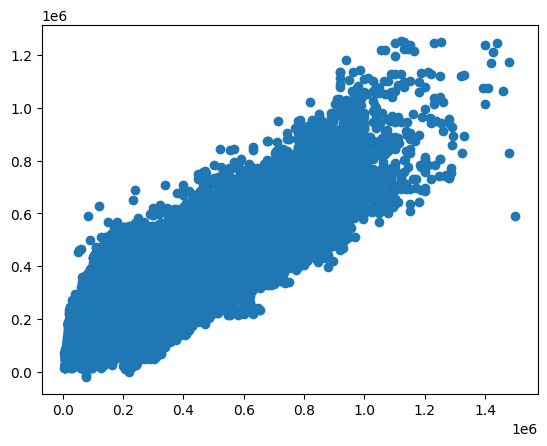

In [114]:
plt.scatter(y_test,y_pred)

In [115]:
#Decision Tree regressor - basic parameters yet to do hyper parameter tuning
model_dt = DecisionTreeRegressor()
model_dt = model_dt.fit(x_train,y_train)

In [116]:
y_pred = model_dt.predict(x_test)

6781032427.117676
59064.358291114644
0.3084985543420531
0.7634044119920278


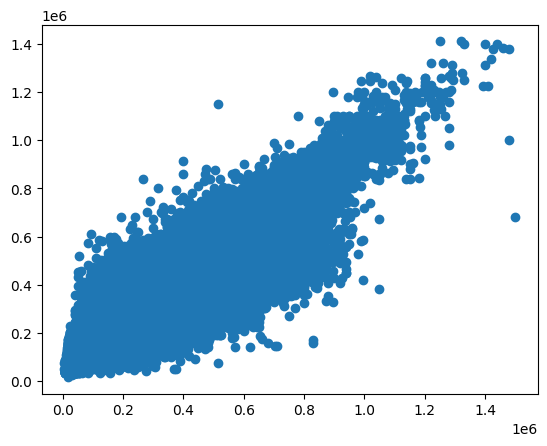

In [117]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#76%
plt.scatter(y_test,y_pred)

In [118]:
#Random forest regressor - basic parameters yet to do hyper parameter tuning
model_rf = RandomForestRegressor()
model_rf = model_rf.fit(x_train, y_train)

In [119]:
y_pred = model_rf.predict(x_test)

6569266361.153847
58066.19270219041
0.3063689098507069
0.7707930976288171


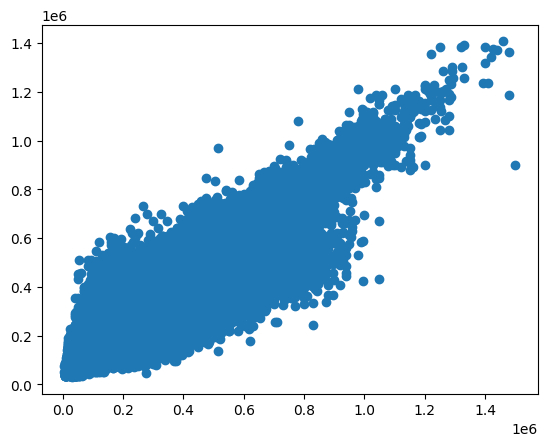

In [120]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#77%
plt.scatter(y_test,y_pred)

In [122]:
X.shape

(923775, 84)

In [123]:
model_xgb = xgb.XGBRegressor()
model_xgb = model_xgb.fit(x_train, y_train)

In [124]:
y_pred = model_xgb.predict(x_test)

6422787564.323749
58343.97268172799
0.30751612505526893
0.7759038587760616


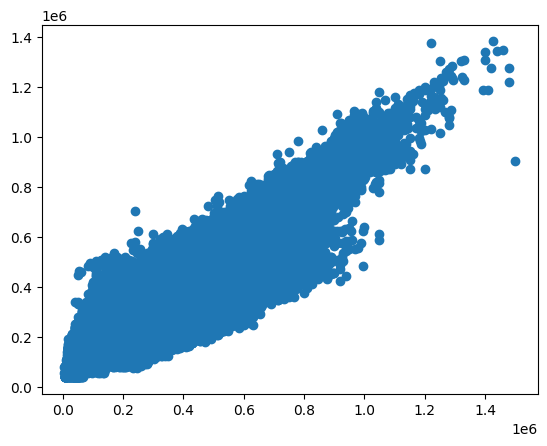

In [125]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#77%
plt.scatter(y_test,y_pred)

In [127]:
#XGBoost Regressor using Grid Search cv

param1 = {
    'nthread':[4],
    'objective':['reg:linear'],
    'learning_rate':[0.03,0.05,0.07],
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'subsample':[0.7],
    'colsample_bytree':[0.7],
    'n_estimators':[50],
}

gs = GridSearchCV(estimator = xgb.XGBRegressor(),
    param_grid=param1,
    cv=3,
    n_jobs=5,
    verbose=True)

gs.fit(x_train,y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\kannan\code\ml_analysis\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:00:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [50], 'nthread': [4],
                         'objective': ['reg:linear'], 'subsample': [0.7]},
             verbose=True)

In [128]:
gs.best_score_

0.7526522083961295

In [129]:
gs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [130]:
best_model_xgb = gs.best_estimator_

y_pred = best_model_xgb.predict(x_test)

7078916053.433243
63202.80093159183
0.33145931394940364
0.7530110165196461


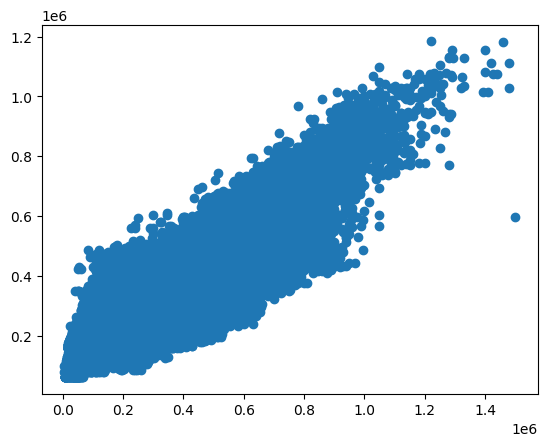

In [131]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
#75%
plt.scatter(y_test,y_pred)

In [132]:
gs.best_index_

35

In [133]:
best_model_xgb.save_model('best_xgb_model.json')